# Brewing Datacup 2020

Equipo: Forest Raids_MX

In [2]:
## Import lybraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
# Importamos data y creamos un dataframe
df = pd.read_csv("https://raw.githubusercontent.com/brewing-datacup/reto-mexico-2020/main/data/ubicaciones.csv")
df 

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon
0,1,A1,1,2.0,20.506052,-98.212377
1,2,A1,1,17.0,20.458128,-98.221248
2,3,A1,1,2.0,20.530427,-98.236860
3,4,A1,3,15.0,20.488655,-98.202940
4,5,A1,1,2.0,20.533253,-98.219669
...,...,...,...,...,...,...
3620,3621,A1,1,15.0,20.558651,-98.149706
3621,3622,A1,1,2.0,20.541300,-98.157300
3622,3623,A1,1,6.0,20.509200,-98.128000
3623,3624,A1,1,31.0,20.513400,-98.154500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id_Cliente   3625 non-null   int64  
 1   id_Agencia   3625 non-null   object 
 2   Frecuencia   3625 non-null   int64  
 3   Vol_Entrega  3625 non-null   float64
 4   lat          3625 non-null   float64
 5   lon          3625 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 170.0+ KB


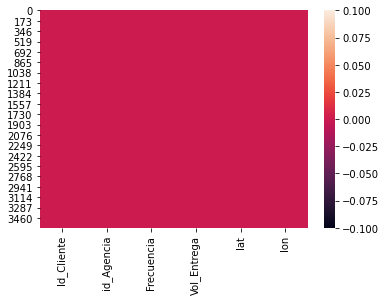

In [5]:
## Buscamos otros datos nulos, just in case
sns.heatmap(df.isnull()) 

In [6]:
# Quitamos latitudes y longitudes repetidas
#DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)

In [7]:
df['Vol_Total']=df['Vol_Entrega']*df['Frecuencia']
df.head(10)

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total
0,1,A1,1,2.0,20.506052,-98.212377,2.0
1,2,A1,1,17.0,20.458128,-98.221248,17.0
2,3,A1,1,2.0,20.530427,-98.236860,2.0
3,4,A1,3,15.0,20.488655,-98.202940,45.0
4,5,A1,1,2.0,20.533253,-98.219669,2.0
5,6,A1,1,19.0,20.531060,-98.182642,19.0
6,7,A1,1,6.0,20.594012,-98.187500,6.0
7,8,A1,1,20.0,20.489329,-98.166364,20.0
8,9,A1,1,15.0,20.575100,-98.228100,15.0
9,10,A1,1,10.0,20.580700,-98.269400,10.0


### Analisis exploratorio de los datos

In [8]:
df.describe()  

,Id_Cliente,Frecuencia,Vol_Entrega,lat,lon,Vol_Total
count,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000
mean,1813.000000,1.097103,13.195724,20.508669,-98.189818,15.006897
std,1046.591691,0.319449,20.158246,0.034647,0.044283,22.972719
min,1.000000,1.000000,0.000000,20.435038,-98.298948,0.000000
25%,907.000000,1.000000,2.000000,20.480661,-98.221491,2.000000
50%,1813.000000,1.000000,6.000000,20.507537,-98.183900,6.000000
75%,2719.000000,1.000000,15.000000,20.537206,-98.153300,18.000000
max,3625.000000,3.000000,175.000000,20.608307,-98.108122,175.000000


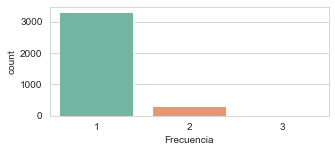

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,2))
sns.countplot(df['Frecuencia'],palette='Set2') ## Una entrega por semana es la frecuencia mas comun

In [10]:
df.groupby(['Frecuencia'])[['Id_Cliente']].count()

,Id_Cliente
Frecuencia,
1,3299
2,300
3,26


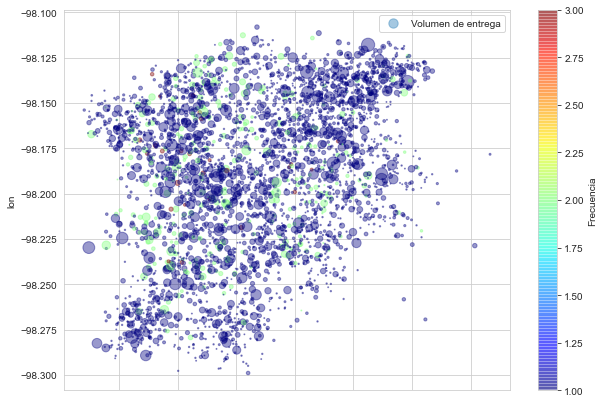

In [11]:
## Vemos la distribucion de nuestros puntos de delivery
df.plot(kind="scatter", x="lat", y="lon",
    s=df['Vol_Entrega'], label="Volumen de entrega",
    c="Frecuencia", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

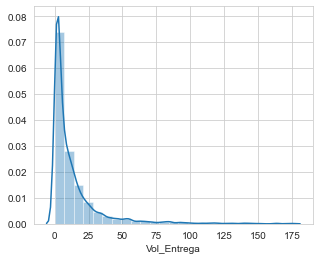

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,4))
sns.distplot(df['Vol_Entrega'], bins=25)  ## Predominan los volumenes de entrega mas pequeños

In [13]:
BBox = (df['lon'].min(),   df['lon'].max(),      
         df['lat'].min(), df['lat'].max())
BBox  ## Con estas sacaremos un mapa del area (https://www.openstreetmap.org/export#map=5/51.500/-0.100)

(-98.298948, -98.108122, 20.435038, 20.608307)

Corresponde a un area entre los estados de Hidalgo y Veracruz

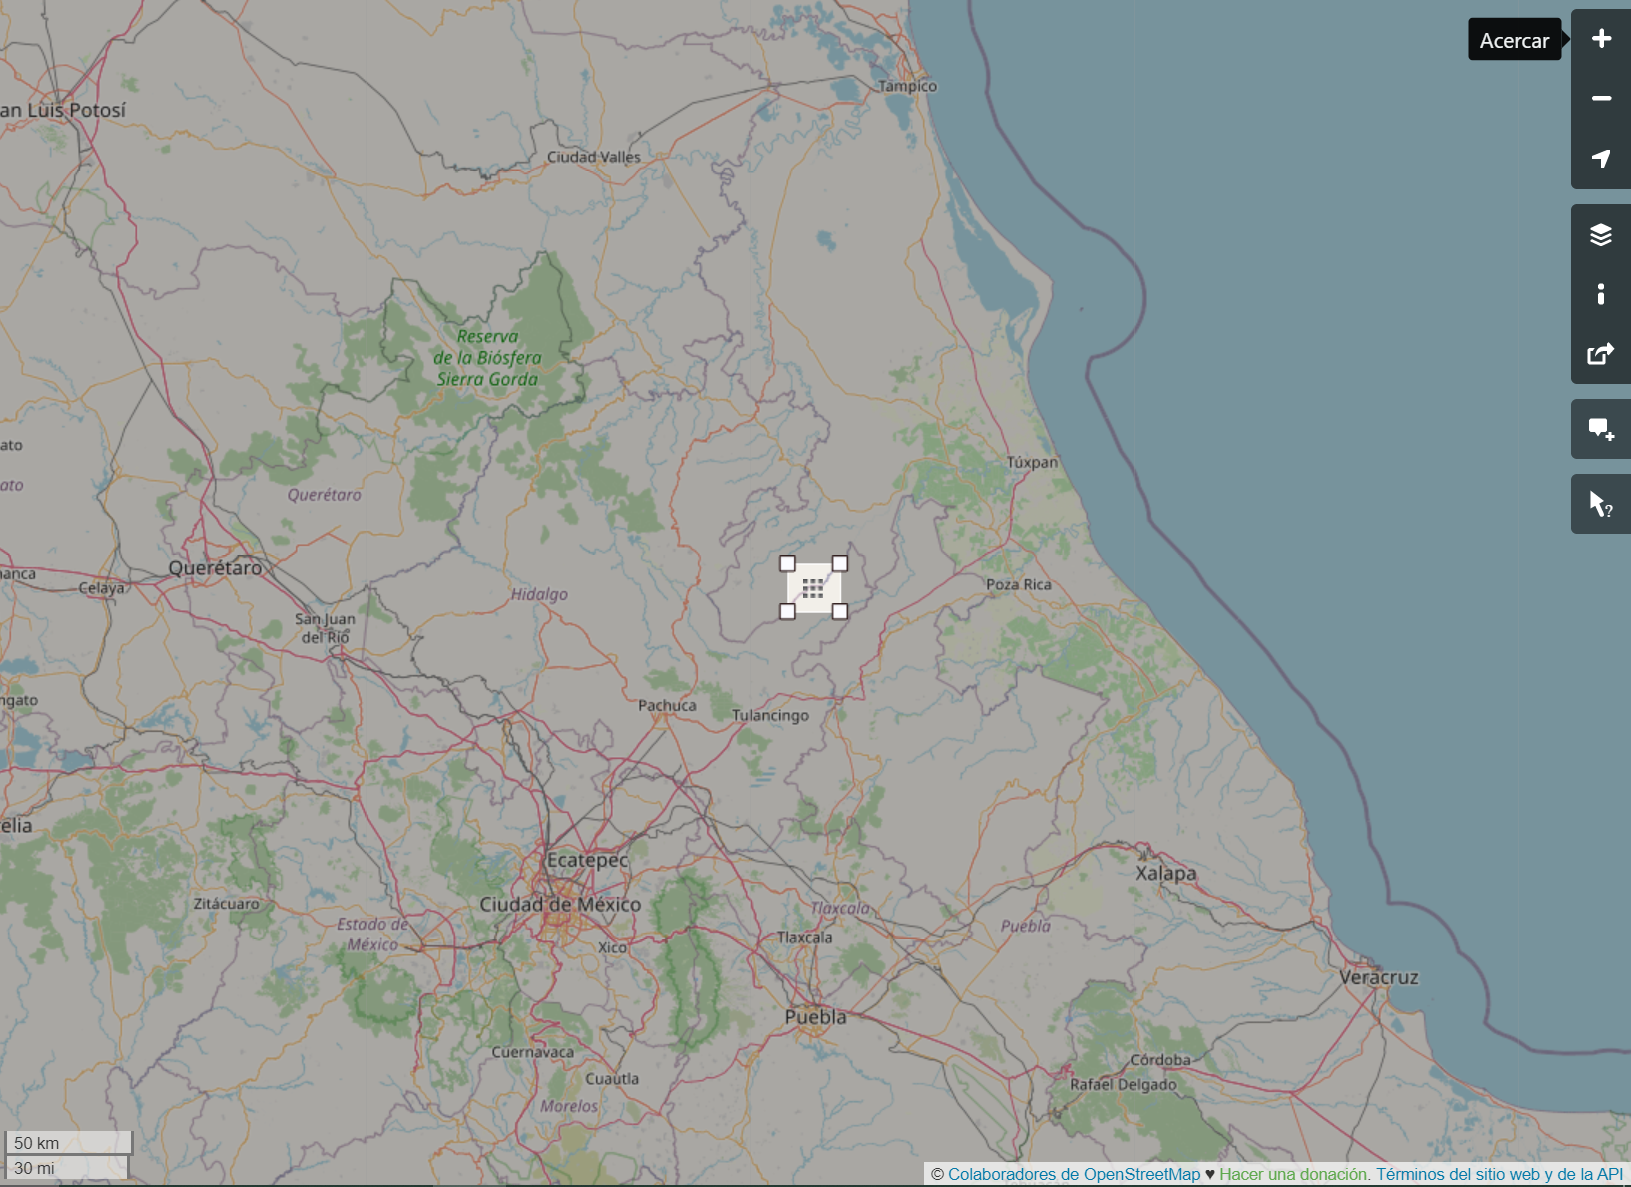

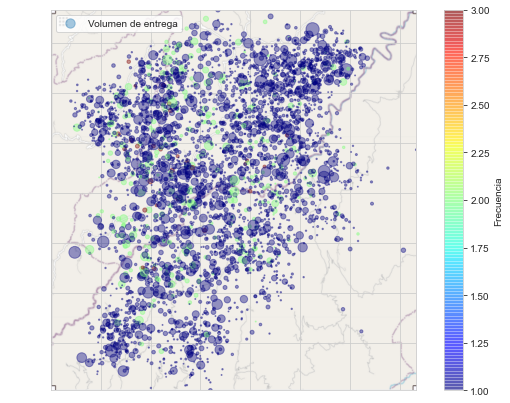

In [14]:
## Ahora graficamos nuestros puntos de delivery en el mapa del area de reparto:
mx_img=mpimg.imread('Capture_mapMX.png')
ax = df.plot(kind="scatter", x="lat", y="lon", figsize=(10,7),
                       s=df['Vol_Entrega'], label="Volumen de entrega",
                       c="Frecuencia", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )
plt.imshow(mx_img, extent=[20.425038, 20.608307, -98.298948, -98.108122,], alpha=1)
plt.ylabel("", fontsize=12)
plt.xlabel("", fontsize=12)
plt.tick_params(colors='w')


plt.legend(fontsize=10)
plt.show()

Se pueden divisar muy vagamente algunos clusters.

## Ahora si empieza el reto!

Converting geolocation data into regions: K-means for geolocation clustering, as it uses Euclidean distance

In [15]:
## Import lybraries
import scipy as sp
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

# for the check the error and accuracy of the model
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [16]:
# Separamos latitud y longitud
X=df.loc[:,['Id_Cliente','lat','lon']]
X.head(10)

,Id_Cliente,lat,lon
0,1,20.506052,-98.212377
1,2,20.458128,-98.221248
2,3,20.530427,-98.236860
3,4,20.488655,-98.202940
4,5,20.533253,-98.219669
5,6,20.531060,-98.182642
6,7,20.594012,-98.187500
7,8,20.489329,-98.166364
8,9,20.575100,-98.228100
9,10,20.580700,-98.269400


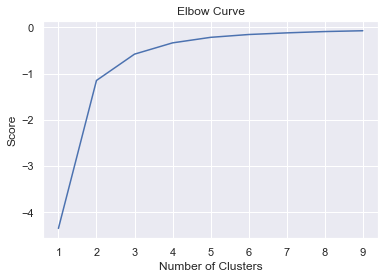

In [17]:
# Numero optimo de clusters
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['lat']]
X_axis = df[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()  ## Esto demuestra que 6 clusters nos dara resultados decentes

In [19]:
# Ahora empezamos a hacer nuestros clusters
kmeans = KMeans(n_clusters = 6, init ='k-means++', max_iter=1000, random_state=45)
kmeans.fit(X[X.columns[1:6]]) # kmeans genera los clusters
X['cluster'] = kmeans.fit_predict(X[X.columns[1:6]])
centers = kmeans.cluster_centers_ # cordina los centros de los clusters
labels = kmeans.predict(X[X.columns[1:6]]) # Etiquetas
X

,Id_Cliente,lat,lon,cluster
0,1,20.506052,-98.212377,5
1,2,20.458128,-98.221248,0
2,3,20.530427,-98.236860,5
3,4,20.488655,-98.202940,0
4,5,20.533253,-98.219669,5
...,...,...,...,...
3620,3621,20.558651,-98.149706,1
3621,3622,20.541300,-98.157300,1
3622,3623,20.509200,-98.128000,1
3623,3624,20.513400,-98.154500,1


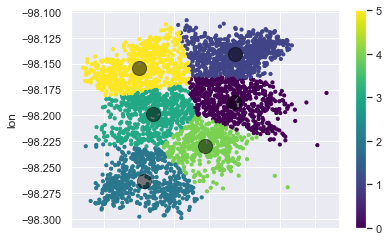

In [20]:
X.plot.scatter(x = 'lat', y = 'lon', c=labels, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)  ## Esta seria una vista preliminar de nuestras areas

In [21]:
# Añadimos nuestras nuevas regiones a nuestro dataset
X = X[['Id_Cliente','cluster']]
X

,Id_Cliente,cluster
0,1,5
1,2,0
2,3,5
3,4,0
4,5,5
...,...,...
3620,3621,1
3621,3622,1
3622,3623,1
3623,3624,1


In [22]:
clustered_data = df.merge(X, left_on='Id_Cliente', right_on='Id_Cliente')
clustered_data

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total,cluster
0,1,A1,1,2.0,20.506052,-98.212377,2.0,5
1,2,A1,1,17.0,20.458128,-98.221248,17.0,0
2,3,A1,1,2.0,20.530427,-98.236860,2.0,5
3,4,A1,3,15.0,20.488655,-98.202940,45.0,0
4,5,A1,1,2.0,20.533253,-98.219669,2.0,5
...,...,...,...,...,...,...,...,...
3620,3621,A1,1,15.0,20.558651,-98.149706,15.0,1
3621,3622,A1,1,2.0,20.541300,-98.157300,2.0,1
3622,3623,A1,1,6.0,20.509200,-98.128000,6.0,1
3623,3624,A1,1,31.0,20.513400,-98.154500,31.0,1


Probamos nuestros resultados:

In [23]:
# ¿Y como se ven estas areas generadas, como segmentan la data?
cd=clustered_data['cluster'].value_counts() 
cd.sort_values(axis=0, ascending=False) ## Numero de pts de reparto por cluster generado

1    780
2    662
0    599
3    590
4    549
5    445
Name: cluster, dtype: int64

In [24]:
ce=clustered_data.groupby(['cluster'])[['Vol_Entrega']].sum()
ce.sort_values(by='Vol_Entrega', axis=0, ascending=False)  ## no esta balanceado

,Vol_Entrega
cluster,
0,9740.500000
2,9032.000000
1,8870.500000
4,7541.666667
3,7325.500000
5,5324.333333


Este modelo hasta ahora solo considera la distancia entre los pts de reparto

*Aun no adaptamos para frecuencias, ya que asume frecuencias 1

*Aun no tenemos un balance ideal

### Balancing the output

In [25]:
# Cuantas frecuencias 2 y 3 dejo afuera el modelo pasado?
clustered_data.groupby(['Frecuencia'])[['Id_Cliente']].count()  ## 326 + 26 puntos por asignar

,Id_Cliente
Frecuencia,
1,3299
2,300
3,26


Ahora si vamos a a asignar las frecuencias>1 asegurandonos que terminen en clusters diferentes pero cercanos + balance general

Nota: Clusters 0, 5 y 1 son los mas vacios

In [26]:
# Empezamos asignando las frecuencias 2
rslt_df2 = clustered_data[clustered_data['Frecuencia'] > 1]  ## frecuencias 2
rslt_df2['Sort_Iteration']=2
rslt_df2

<ipython-input-26-d310aa422603>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df2['Sort_Iteration']=2


,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total,cluster,Sort_Iteration
3,4,A1,3,15.0,20.488655,-98.202940,45.0,0,2
12,13,A1,2,13.0,20.537454,-98.140527,26.0,1,2
16,17,A1,2,13.5,20.519419,-98.228799,27.0,5,2
17,18,A1,2,7.0,20.539439,-98.231014,14.0,5,2
21,22,A1,2,12.0,20.534294,-98.163798,24.0,3,2
...,...,...,...,...,...,...,...,...,...
3542,3543,A1,2,13.5,20.522600,-98.217700,27.0,5,2
3547,3548,A1,2,0.5,20.547308,-98.143832,1.0,1,2
3574,3575,A1,2,4.0,20.534023,-98.131136,8.0,1,2
3587,3588,A1,2,17.0,20.478326,-98.242853,34.0,4,2


In [27]:
X2=rslt_df2.loc[:,['Id_Cliente','lat','lon']]

In [28]:
Y2_axis = rslt_df2[['lat']]
X2_axis = rslt_df2[['lon']]

In [30]:
X2['clusterf2'] = kmeans.fit_predict(X2[X2.columns[1:6]])
centers = kmeans.cluster_centers_ # cordina los centros de los clusters
labels = kmeans.predict(X2[X2.columns[1:6]]) # Etiquetas
X2

,Id_Cliente,lat,lon,clusterf2
3,4,20.488655,-98.202940,4
12,13,20.537454,-98.140527,5
16,17,20.519419,-98.228799,2
17,18,20.539439,-98.231014,2
21,22,20.534294,-98.163798,5
...,...,...,...,...
3542,3543,20.522600,-98.217700,2
3547,3548,20.547308,-98.143832,5
3574,3575,20.534023,-98.131136,5
3587,3588,20.478326,-98.242853,0


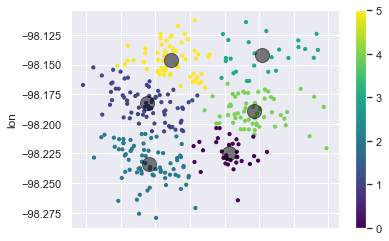

In [31]:
X2.plot.scatter(x = 'lat', y = 'lon', c=labels, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)  ## clusters de f2

In [32]:
X2 = X2[['Id_Cliente','clusterf2']]
test_data1 = clustered_data.merge(X2, left_on='Id_Cliente', right_on='Id_Cliente')
test_data1

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total,cluster,clusterf2
0,4,A1,3,15.0,20.488655,-98.202940,45.0,0,4
1,13,A1,2,13.0,20.537454,-98.140527,26.0,1,5
2,17,A1,2,13.5,20.519419,-98.228799,27.0,5,2
3,18,A1,2,7.0,20.539439,-98.231014,14.0,5,2
4,22,A1,2,12.0,20.534294,-98.163798,24.0,3,5
...,...,...,...,...,...,...,...,...,...
321,3543,A1,2,13.5,20.522600,-98.217700,27.0,5,2
322,3548,A1,2,0.5,20.547308,-98.143832,1.0,1,5
323,3575,A1,2,4.0,20.534023,-98.131136,8.0,1,5
324,3588,A1,2,17.0,20.478326,-98.242853,34.0,4,0


In [33]:
# Comprobamos que nuestros datos esten en clusters diferentes
test_data1['same_cluster'] = np.where(test_data1['cluster'] == test_data1['clusterf2'], 'True', 'False')
test_data1['same_cluster'].value_counts() 

False    236
True      90
Name: same_cluster, dtype: int64

In [34]:
# Conservamos los 267 no repetidos y los agregamos a nuestro dataframe de clustering
temp = test_data1[test_data1['same_cluster'] == 'False']
t=temp.loc[:,['Id_Cliente','id_Agencia','Frecuencia','Vol_Entrega','lat','lon','Vol_Total','clusterf2']]
t_new = t.rename(columns={'clusterf2': 'cluster'})
frames = [clustered_data, t_new]
clustered_data_up2 = pd.concat(frames)
clustered_data_up2

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total,cluster
0,1,A1,1,2.0,20.506052,-98.212377,2.0,5
1,2,A1,1,17.0,20.458128,-98.221248,17.0,0
2,3,A1,1,2.0,20.530427,-98.236860,2.0,5
3,4,A1,3,15.0,20.488655,-98.202940,45.0,0
4,5,A1,1,2.0,20.533253,-98.219669,2.0,5
...,...,...,...,...,...,...,...,...
319,3541,A1,2,13.0,20.463676,-98.183056,26.0,4
321,3543,A1,2,13.5,20.522600,-98.217700,27.0,2
322,3548,A1,2,0.5,20.547308,-98.143832,1.0,5
323,3575,A1,2,4.0,20.534023,-98.131136,8.0,5


In [35]:
# Generamos un dataframe para las frecuencias 3 y los rows que rechazamos de frecuencias 2
rslt_df3 = clustered_data[clustered_data['Frecuencia'] > 2]  ## frecuencias 3
rslt_df3['Sort_Iteration']=3
temp = test_data1[test_data1['same_cluster'] == 'True']  # rows rechazados
t=temp.loc[:,['Id_Cliente','id_Agencia','Frecuencia','Vol_Entrega','lat','lon','Vol_Total','cluster']]
frames = [rslt_df3, t]
rslt_df3_up = pd.concat(frames)
rslt_df3_up  ## Los NaN son las frecuencias 2

<ipython-input-35-8e01766cff1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df3['Sort_Iteration']=3


,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total,cluster,Sort_Iteration
3,4,A1,3,15.000000,20.488655,-98.202940,45.0,0,3.0
26,27,A1,3,18.333333,20.465444,-98.173468,55.0,2,3.0
45,46,A1,3,9.333333,20.532144,-98.186759,28.0,3,3.0
55,56,A1,3,18.333333,20.458749,-98.170414,55.0,2,3.0
56,57,A1,3,21.666667,20.495939,-98.187330,65.0,0,3.0
...,...,...,...,...,...,...,...,...,...
306,3265,A1,2,80.500000,20.517026,-98.199411,161.0,3,NaN
317,3539,A1,2,17.500000,20.484480,-98.224674,35.0,0,NaN
318,3540,A1,2,12.000000,20.531862,-98.197489,24.0,3,NaN
320,3542,A1,2,13.000000,20.456436,-98.219295,26.0,0,NaN


In [36]:
X3=rslt_df3_up.loc[:,['Id_Cliente','lat','lon']]
Y3_axis = rslt_df3_up[['lat']]
X3_axis = rslt_df3_up[['lon']]

In [38]:
X3['clusterf3'] = kmeans.fit_predict(X3[X3.columns[1:6]])
centers = kmeans.cluster_centers_ # cordina los centros de los clusters
labels = kmeans.predict(X3[X3.columns[1:6]]) # Etiquetas
X3

,Id_Cliente,lat,lon,clusterf3
3,4,20.488655,-98.202940,2
26,27,20.465444,-98.173468,4
45,46,20.532144,-98.186759,1
55,56,20.458749,-98.170414,4
56,57,20.495939,-98.187330,4
...,...,...,...,...
306,3265,20.517026,-98.199411,0
317,3539,20.484480,-98.224674,2
318,3540,20.531862,-98.197489,0
320,3542,20.456436,-98.219295,2


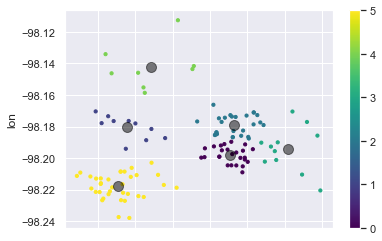

In [39]:
X3.plot.scatter(x = 'lat', y = 'lon', c=labels, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)  ## clusters de f3

In [40]:
X3 = X3[['Id_Cliente','clusterf3']]
test_data2 = clustered_data_up2.merge(X3, left_on='Id_Cliente', right_on='Id_Cliente')
test_data2

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total,cluster,clusterf3
0,4,A1,3,15.000000,20.488655,-98.202940,45.0,0,2
1,4,A1,3,15.000000,20.488655,-98.202940,45.0,4,2
2,23,A1,2,10.000000,20.465644,-98.222902,20.0,0,2
3,25,A1,2,15.000000,20.473419,-98.221992,30.0,0,2
4,27,A1,3,18.333333,20.465444,-98.173468,55.0,2,4
...,...,...,...,...,...,...,...,...,...
131,3536,A1,3,10.333333,20.471045,-98.237387,31.0,0,2
132,3539,A1,2,17.500000,20.484480,-98.224674,35.0,0,2
133,3540,A1,2,12.000000,20.531862,-98.197489,24.0,3,0
134,3542,A1,2,13.000000,20.456436,-98.219295,26.0,0,2


In [41]:
# Comprobamos que nuestros datos esten en clusters diferentes
test_data2['same_cluster'] = np.where(test_data2['cluster'] == test_data2['clusterf3'], 'True', 'False')
test_data2['same_cluster'].value_counts()  ## 23 repetidos

False    114
True      22
Name: same_cluster, dtype: int64

In [42]:
# Conservamos los no repetidos y los agregamos a nuestro dataframe de clustering
temp = test_data2[test_data2['same_cluster'] == 'False']
t=temp.loc[:,['Id_Cliente','id_Agencia','Frecuencia','Vol_Entrega','lat','lon','Vol_Total','clusterf3']]
t_new = t.rename(columns={'clusterf3': 'cluster'})
frames = [clustered_data_up2, t_new]
clustered_data_up3 = pd.concat(frames)
clustered_data_up3

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total,cluster
0,1,A1,1,2.000000,20.506052,-98.212377,2.0,5
1,2,A1,1,17.000000,20.458128,-98.221248,17.0,0
2,3,A1,1,2.000000,20.530427,-98.236860,2.0,5
3,4,A1,3,15.000000,20.488655,-98.202940,45.0,0
4,5,A1,1,2.000000,20.533253,-98.219669,2.0,5
...,...,...,...,...,...,...,...,...
131,3536,A1,3,10.333333,20.471045,-98.237387,31.0,2
132,3539,A1,2,17.500000,20.484480,-98.224674,35.0,2
133,3540,A1,2,12.000000,20.531862,-98.197489,24.0,0
134,3542,A1,2,13.000000,20.456436,-98.219295,26.0,2


In [43]:
temp = test_data2[test_data2['same_cluster'] == 'True']
X4=temp.loc[:,['Id_Cliente','lat','lon']]
Y4_axis = temp[['lat']]
X4_axis = temp[['lon']]

In [45]:
X4['clusterf4'] = kmeans.fit_predict(X4[X4.columns[1:6]])
centers = kmeans.cluster_centers_ # cordina los centros de los clusters
labels = kmeans.predict(X4[X4.columns[1:6]]) # Etiquetas
X4

,Id_Cliente,lat,lon,clusterf4
5,27,20.465444,-98.173468,1
7,36,20.554633,-98.195613,3
8,38,20.547421,-98.190225,3
12,54,20.577456,-98.185753,0
15,56,20.458749,-98.170414,1
17,57,20.495939,-98.187330,2
19,58,20.480026,-98.178043,2
40,110,20.485803,-98.188667,2
42,111,20.461937,-98.177861,1
50,132,20.549300,-98.202245,3


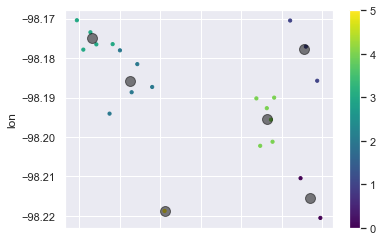

In [46]:
X4.plot.scatter(x = 'lat', y = 'lon', c=labels, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)  ## clusters residuales

In [47]:
X4 = X4[['Id_Cliente','clusterf4']]
test_data3 = temp.merge(X4, left_on='Id_Cliente', right_on='Id_Cliente')
# Comprobamos que nuestros datos esten en clusters diferentes
test_data3['same_cluster'] = np.where(test_data3['cluster'] == test_data3['clusterf4'], 'True', 'False')
test_data3['same_cluster'].value_counts()  ## no. de repetidos

False    16
True      6
Name: same_cluster, dtype: int64

In [48]:
t=test_data3.loc[:,['Id_Cliente','id_Agencia','Frecuencia','Vol_Entrega','lat','lon','Vol_Total','clusterf4']]
t_new = t.rename(columns={'clusterf4': 'cluster'})
frames = [clustered_data_up3, t_new]
clustered_data_up4 = pd.concat(frames)
clustered_data_up4

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,Vol_Total,cluster
0,1,A1,1,2.0,20.506052,-98.212377,2.0,5
1,2,A1,1,17.0,20.458128,-98.221248,17.0,0
2,3,A1,1,2.0,20.530427,-98.236860,2.0,5
3,4,A1,3,15.0,20.488655,-98.202940,45.0,0
4,5,A1,1,2.0,20.533253,-98.219669,2.0,5
...,...,...,...,...,...,...,...,...
17,583,A1,2,13.5,20.569233,-98.210453,27.0,4
18,766,A1,2,63.0,20.556204,-98.190031,126.0,3
19,934,A1,2,6.5,20.579025,-98.220525,13.0,4
20,2919,A1,2,6.5,20.564090,-98.170488,13.0,0


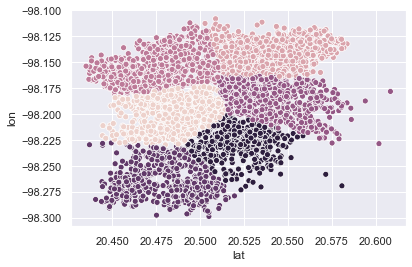

In [49]:
sns.scatterplot(x=clustered_data['lat'], y=clustered_data['lon'], hue=clustered_data['cluster'], legend = False) 
## preview de zonas f=1

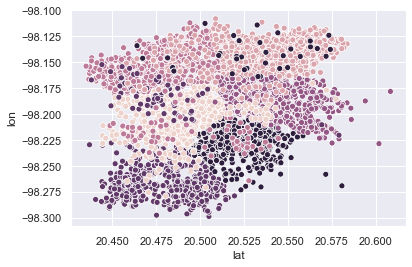

In [50]:
sns.scatterplot(x=clustered_data_up4['lat'], y=clustered_data_up4['lon'], hue=clustered_data_up4['cluster'], legend = False) 
## preview de todas las zonas, not soo good D:

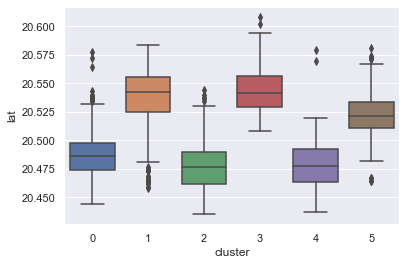

In [51]:
i = 0
sns.boxplot(x='cluster', y=clustered_data_up4['lat'] , data=clustered_data_up4)
plt.show()

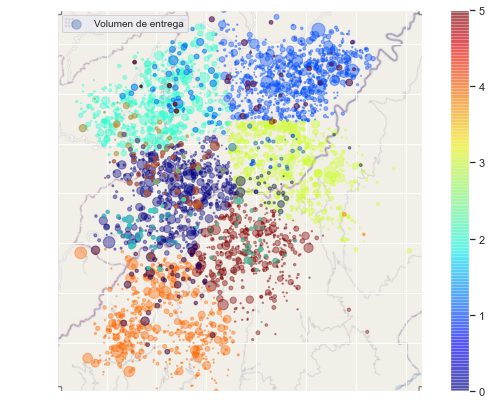

In [54]:
## Ahora graficamos nuestros puntos de delivery en el mapa del area de reparto:
mx_img=mpimg.imread('Capture_mapMX.png')
ax = clustered_data_up4.plot(kind="scatter", x="lat", y="lon", figsize=(10,7),
                       s=clustered_data_up4['Vol_Entrega'], label="Volumen de entrega",
                       c=clustered_data_up4["cluster"], cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )
plt.imshow(mx_img, extent=[20.425038, 20.608307, -98.298948, -98.108122,], alpha=1)
plt.ylabel("", fontsize=12)
plt.xlabel("", fontsize=12)
plt.tick_params(colors='w')


plt.legend(fontsize=10)
plt.show()

In [57]:
# ¿Y como se ven estas areas generadas, como segmentan la data?
cd=clustered_data_up4['cluster'].value_counts() 
#cd.sort_values(axis=0, ascending=False) ## Numero de pts de reparto por cluster generado
cd

1    870
2    739
0    673
4    633
3    597
5    485
Name: cluster, dtype: int64

In [56]:
ce=clustered_data_up4.groupby(['cluster'])[['Vol_Entrega']].sum()
ce.sort_values(by='Vol_Entrega', axis=0, ascending=False)  ## no esta balanceado

,Vol_Entrega
cluster,
0,11216.666667
1,10504.500000
2,10300.166667
4,9198.166667
3,7464.000000
5,6021.833333


### Ahora a generar el formato de entrega

In [53]:
dfresultst=clustered_data_up4.loc[:,['Id_Cliente','cluster']]
dfresultst

,Id_Cliente,cluster
0,1,5
1,2,0
2,3,5
3,4,0
4,5,5
...,...,...
17,583,4
18,766,3
19,934,4
20,2919,0


In [54]:
dfresults=pd.get_dummies(dfresultst, columns=['cluster'])
dfresults

,Id_Cliente,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,1,0,0,0,0,0,1
1,2,1,0,0,0,0,0
2,3,0,0,0,0,0,1
3,4,1,0,0,0,0,0
4,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...
17,583,0,0,0,0,1,0
18,766,0,0,0,1,0,0
19,934,0,0,0,0,1,0
20,2919,1,0,0,0,0,0


In [55]:
df_final=dfresults.groupby('Id_Cliente').sum()
df_final

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
Id_Cliente,,,,,,
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,2,0,1,0
5,0,0,0,0,0,1
...,...,...,...,...,...,...
3621,0,1,0,0,0,0
3622,0,1,0,0,0,0
3623,0,1,0,0,0,0


In [56]:
df_final = df_final.rename(columns={'cluster_0': 'D1', 'cluster_1': 'D2', 'cluster_2': 'D3', 'cluster_3': 'D4', 'cluster_4': 'D5', 'cluster_5': 'D6'})
df_final

,D1,D2,D3,D4,D5,D6
Id_Cliente,,,,,,
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,2,0,1,0
5,0,0,0,0,0,1
...,...,...,...,...,...,...
3621,0,1,0,0,0,0
3622,0,1,0,0,0,0
3623,0,1,0,0,0,0


In [57]:
print(df_final.loc[df_final['D1'] == 2])
print(df_final.loc[df_final['D2'] == 2])
print(df_final.loc[df_final['D3'] == 2])
print(df_final.loc[df_final['D4'] == 2])
print(df_final.loc[df_final['D5'] == 2])
print(df_final.loc[df_final['D6'] == 2])  ## aaayyy no D:

            D1  D2  D3  D4  D5  D6
Id_Cliente                        
182          2   0   0   1   0   0
            D1  D2  D3  D4  D5  D6
Id_Cliente                        
46           0   2   0   1   0   0
102          0   2   0   1   0   0
114          0   2   0   1   0   0
164          0   2   0   1   0   0
            D1  D2  D3  D4  D5  D6
Id_Cliente                        
4            1   0   2   0   1   0
120          1   0   2   0   1   0
142          0   0   2   0   0   2
179          1   0   2   0   1   0
191          1   0   2   0   0   0
3536         1   0   2   0   1   0
            D1  D2  D3  D4  D5  D6
Id_Cliente                        
36           0   0   0   2   0   0
38           0   0   0   2   0   0
132          0   0   0   2   0   0
152          0   0   0   2   0   0
228          0   0   0   2   0   0
766          0   0   0   2   0   0
            D1  D2  D3  D4  D5  D6
Id_Cliente                        
27           0   1   1   0   2   0
56           0   1  

In [129]:
df_final.reset_index('Id_Cliente')
df_final

,D1,D2,D3,D4,D5,D6
Id_Cliente,,,,,,
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,2,0,1,0
5,0,0,0,0,0,1
...,...,...,...,...,...,...
3621,0,1,0,0,0,0
3622,0,1,0,0,0,0
3623,0,1,0,0,0,0


In [128]:
df_final.to_csv ('dfresults_forestraids0.csv', index=None, header = True)

In [ ]:
## 3625 rows expected